<a href="https://colab.research.google.com/github/govind-tiwari/HandwrittenDigitRecog/blob/main/DigitRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing**

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


**Loading dataset and splitting them**

In [25]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

**Normalising**

In [26]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

**Creating Neural Network** **i.e Model**

In [27]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))

**Compiling the Model**

In [28]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Training the Model**

In [29]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2614 - accuracy: 0.9237
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1061 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0732 - accuracy: 0.9770


**Evaluating Our Model**

In [30]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9706
0.9706000089645386
0.09316200017929077


**Saving the Model**

In [31]:
model.save('digit.model')

INFO:tensorflow:Assets written to: digit.model/assets


**Testing**

Mounted at /content/gdrive
The Number is probably:6


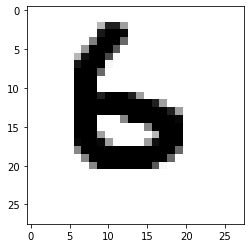

The Number is probably:5


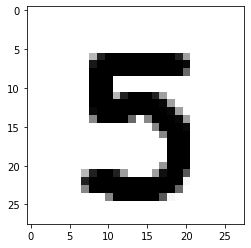

The Number is probably:8


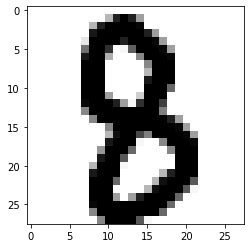

The Number is probably:3


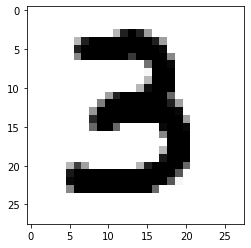

In [32]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
drive.mount("/content/gdrive")
model=tf.keras.models.load_model("./digit.model")
for x in range(1,5):
  img=cv.imread(f'{x}.png')[:,:,0]
  img=np.invert(np.array([img]))
  prediction=model.predict(img)
  print(f'The Number is probably:{np.argmax(prediction)}')
  plt.imshow(img[0],cmap=plt.cm.binary)
  plt.show()